In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
from tensorflow import keras

import keras.utils.np_utils as ku

from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

#from keras.layers.convolutional import Conv2D#, MaxPool2D
keras.__version__

Using TensorFlow backend.
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framewo

'2.2.4-tf'

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# Label column and pixel columns of training dataset
train_y = df_train.iloc[:, 0]
train_x = df_train.iloc[:, 1:].values

# Pixel data of test dataset
test = df_test.iloc[:, 0:].values

train_x = train_x/255.
test = test/255.

train_x = train_x.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

# Check labels of train data
train_y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [4]:
# Change labels to one hot encoded:
train_y_hot = keras.utils.to_categorical(train_y)
train_y_hot

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [5]:
# Create Keras Callbacks for learning rate
my_callbacks_lr = [LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)]

In [7]:
# Let's start with a simple 2 convlutional layers
# In this part we try different number of filters to see what is the optimum number of filters
N = 4 # number of try
model = [0] * N
filter_number = [12*i + 12 for i in range(4)]
for i, f in zip(range(N), filter_number):
    
    #Initialising convlutional Neuran Network
    model[i] = Sequential()

    # step 1: 1st Convlution layer
    model[i].add(Conv2D(f,kernel_size = 5,activation='relu', input_shape=(28,28,1)))

    # Step 2: A second Convlutional layer
    # New layers make the NN deeper and might help improving the accuracy of the NN
    model[i].add(Conv2D(2*f,kernel_size=5,activation='relu'))

    # step 3: Flattening
    model[i].add(Flatten())

    # step 4: Full connection 
    model[i].add(Dense(128, activation='relu'))
    model[i].add(Dense(10, activation='softmax'))

    # Compile the model
    model[i].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


    # Model summary
    model[i].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 12)        312       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 24)        7224      
_________________________________________________________________
flatten_4 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1228928   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 1,237,754
Trainable params: 1,237,754
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   


In [8]:
result = [0] * N
for i in range(4): 
    # Fitting CNN to training dataset
    result[i] = model[i].fit(x = train_x,
              y = train_y_hot,
              epochs = 20,
              batch_size= 32, 
              verbose= 1, 
              callbacks= my_callbacks_lr,
              validation_split= 0.2,
              shuffle= True)

Train on 33600 samples, validate on 8400 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
33600/33600 [==============================] - 101s 3ms/sample - loss: 0.1453 - acc: 0.9553 - val_loss: 0.0516 - val_acc: 0.9825
Epoch 2/20
33600/33600 [==============================] - 101s 3ms/sample - loss: 0.0464 - acc: 0.9849 - val_loss: 0.0602 - val_acc: 0.9811
Epoch 3/20
33600/33600 [==============================] - 85s 3ms/sample - loss: 0.0268 - acc: 0.9915 - val_loss: 0.0621 - val_acc: 0.9821
Epoch 4/20
33600/33600 [==============================] - 63s 2ms/sample - loss: 0.0197 - acc: 0.9934 - val_loss: 0.0440 - val_acc: 0.9874
Epoch 5/20
33600/33600 [==============================] - 83s 2ms/sample - loss: 0.0111 - acc: 0.9965 - val_loss: 0.0482 - val_acc: 0.9879
Epoch 6/20
33600/33600 [==============================] - 99s 3ms/sample - loss: 0.0095 - acc: 0.9971 - val_loss: 0.0448 - val_acc: 0.9887
Epoch 7/20
33600/33600 [==============================] - 100s 3ms/

33600/33600 [==============================] - 198s 6ms/sample - loss: 0.0015 - acc: 0.9996 - val_loss: 0.0593 - val_acc: 0.9900
Epoch 16/20
33600/33600 [==============================] - 198s 6ms/sample - loss: 8.1941e-04 - acc: 0.9999 - val_loss: 0.0558 - val_acc: 0.9901
Epoch 17/20
33600/33600 [==============================] - 199s 6ms/sample - loss: 4.8543e-04 - acc: 1.0000 - val_loss: 0.0572 - val_acc: 0.9901
Epoch 18/20
33600/33600 [==============================] - 198s 6ms/sample - loss: 4.8274e-04 - acc: 1.0000 - val_loss: 0.0573 - val_acc: 0.99055s -
Epoch 19/20
33600/33600 [==============================] - 221s 7ms/sample - loss: 4.8173e-04 - acc: 1.0000 - val_loss: 0.0575 - val_acc: 0.9905
Epoch 20/20
33600/33600 [==============================] - 206s 6ms/sample - loss: 4.8107e-04 - acc: 1.0000 - val_loss: 0.0580 - val_acc: 0.9906
Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 273s 8ms/sample - loss: 0.1277 - ac

<IPython.core.display.Javascript object>


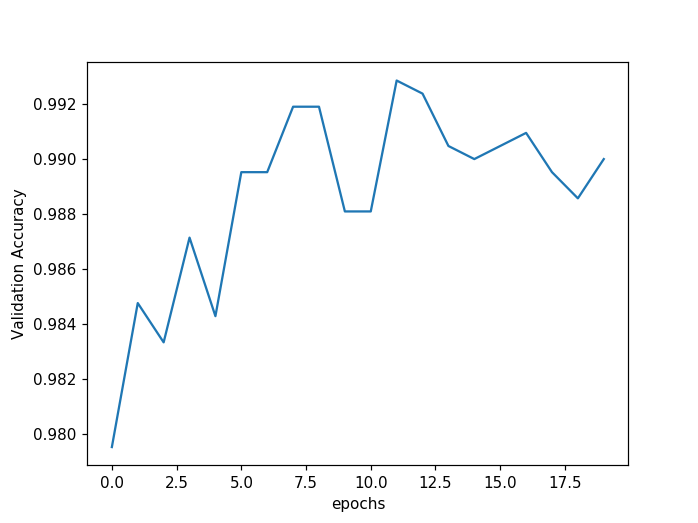

Text(0, 0.5, 'Validation Accuracy')

In [11]:
%matplotlib notebook
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy')

In [12]:
# Predictions
predictions = model.predict(test)
predictions_num = np.argmax(predictions, axis = 1)

In [13]:
# create submission file
answer = pd.DataFrame({'ImageId': list(range(1, len(predictions) + 1)), 'Label': 
                      np.argmax(predictions, axis = 1)})
answer.to_csv('digit_recognition.csv', index = False, header=True)

In [12]:
for i in range(3):
    print(i)

0
1
2
